In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [2]:
def rhs2(t, y, k, m, g, N):
    x, v = np.split(y, 2)
    xdot = v
    vdot = np.zeros_like(v)
    vdot[0] = -N*g + k/m * (x[1] - x[0])
    vdot[1:-1] = k/m * (x[2:] - 2*x[1:-1] + x[:-2])
    vdot[-1] = k/m * (x[-2] - x[-1])
    return np.hstack((xdot, vdot))

In [3]:
#Data from our springs and masses
#L0 = 0.4639
#l0 = L0 / (N - 1)
KK = 0.4399
MM = 56.6E-3
g = 9.81

In [4]:
# Simple run
N = 3
k = KK * (N - 1)
m = MM / N
x0 = np.zeros(N)
v0 = np.zeros(N)
y0 = np.hstack((x0, v0))
soluc = solve_ivp(rhs2, [0, 0.4], y0, args=[k, m, g, N], max_step=0.01)
tn = soluc.t
xn, vn = (np.vsplit(soluc.y, 2))

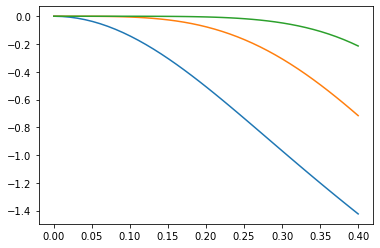

In [5]:
plt.plot(tn, xn[0], tn, xn[1], tn, xn[2]);

In [15]:
# Generate data for plots of last mass for different N's
tx_data = []
for N in (3, 5, 20):
    k = KK * (N - 1)
    m = MM
    x0 = np.zeros(N)
    v0 = np.zeros(N)
    y0 = np.hstack((x0, v0))
    soluc = solve_ivp(rhs2, [0, 0.4], y0, args=[k, m, g, N], max_step=0.005)
    tn = soluc.t
    xn, vn = (np.vsplit(soluc.y, 2))
    tx_data.append((N,tn,xn[-1]))


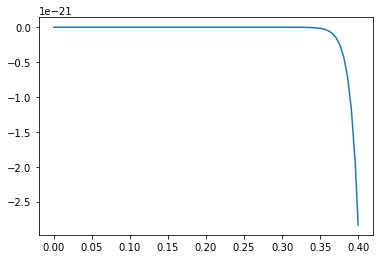

In [19]:
for case in tx_data[-1:]:
    t = case[1]
    x = case[2]
    plt.plot(t, x);